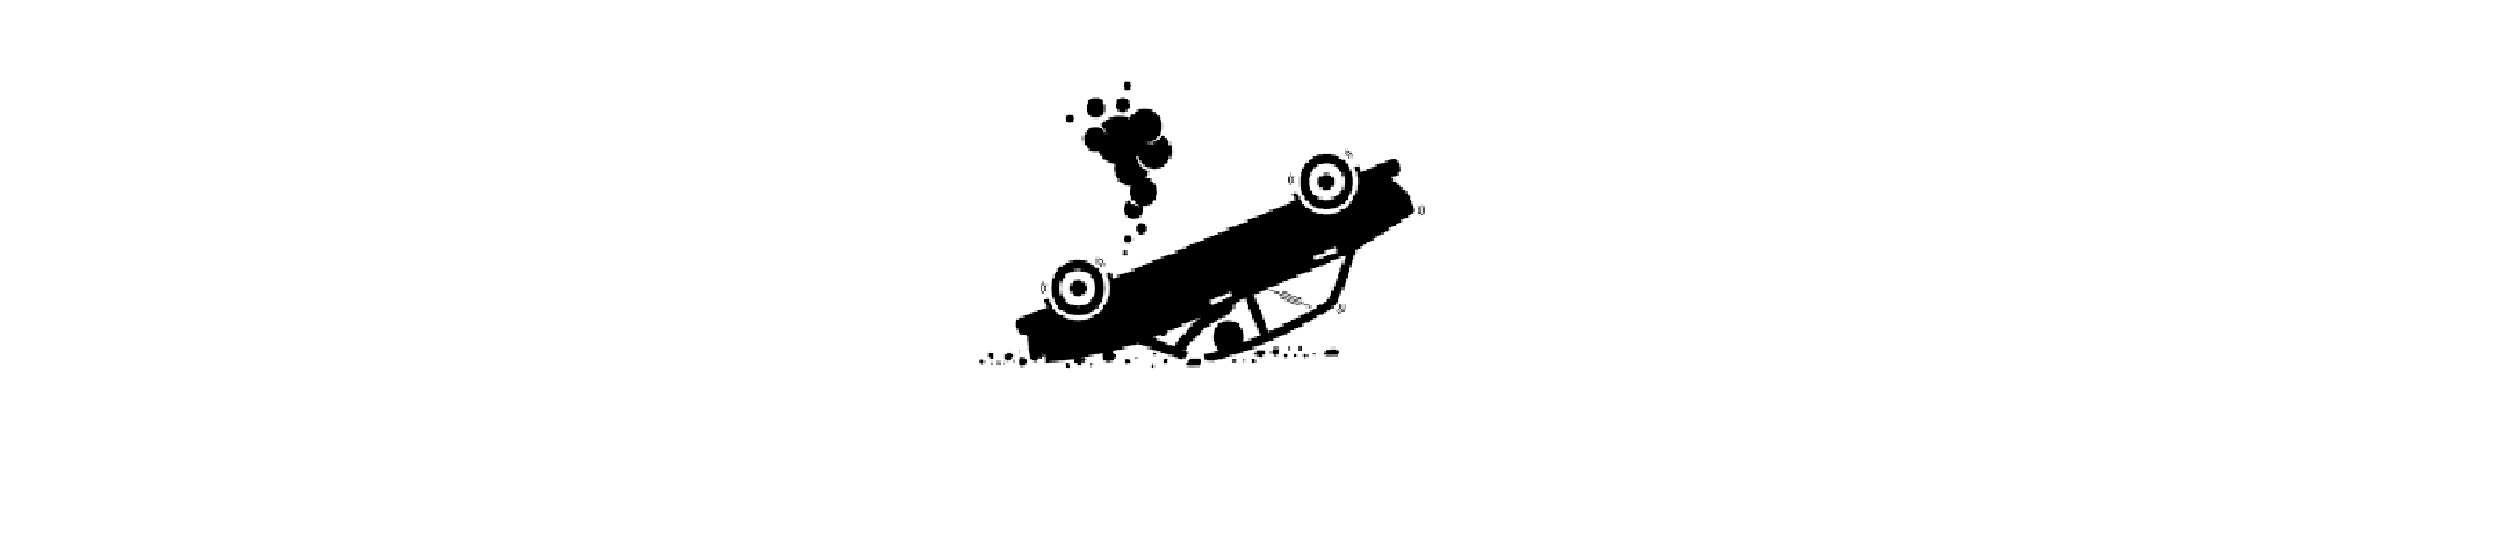
<center> <h2> REGRESSION ANALYSIS </h2> </center> <br>
<center> <h4> Investigating the Relationship Between Fatal Accidents and Percentage of Drivers Under the Age of 21 </h4>  </center>

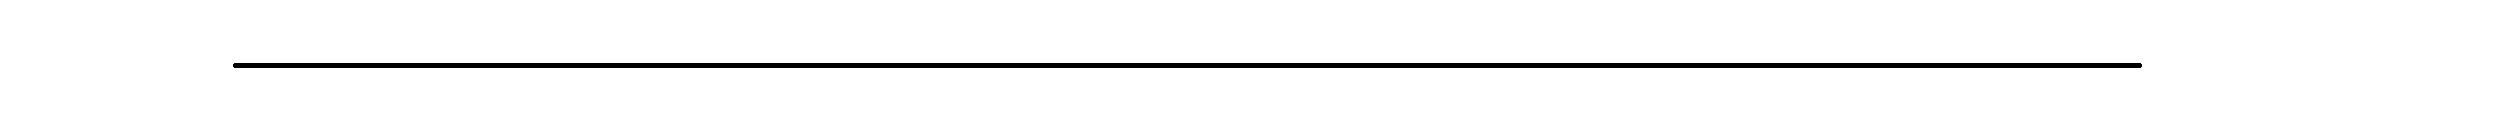

### Background

As part of a study on transportation safety, the U.S. Department of Transportation collected data on the number of fatal accidents per 1000 licenses and the percentage of licensed drivers under the age of 21 in a sample of 42 cities. Data collected over a one-year period follow. <br> These data are contained in the file named `Safety`.

### Case Study Objectives

- Use regression analysis to investigate the relationship between the number of fatal accidents and the percentage of drivers under the age of 21.
- Discuss your findings.
- What conclusion and recommendations can you derive from your analysis? 

### Part I: Exploratory Data Analysis

#### Import libraries, dataset, and define functions

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#define functions

def showoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        return outliers

def countoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        count = len(outliers)
        print(f'{column_name} outlier count: {count}')

In [22]:
#import dataset
safety = pd.read_excel('Safety.xlsx')

#remove newline from the column name
safety.columns = safety.columns.str.replace(r'\n', ' ', regex = True)

#display data
safety.head()

,Percent Under 21,Fatal Accidents per 1000
0,13,2.962
1,12,0.708
2,8,0.885
3,12,1.652
4,11,2.091


#### Dataset Properties

In [4]:
#shape of dataset

rows = safety.shape[0]
cols = safety.shape[1]
print(f'There are {rows} rows and {cols} columns in the dataset')

There are 42 rows and 2 columns in the dataset


In [5]:
#data types

safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Percent Under 21          42 non-null     int64  
 1   Fatal Accidents per 1000  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


In [6]:
#missing values

print('Number of missing values per column')
safety.isnull().sum()

Number of missing values per column


Percent Under 21            0
Fatal Accidents per 1000    0
dtype: int64

In [7]:
#basic statistics

safety.describe()

,Percent Under 21,Fatal Accidents per 1000
count,42.000000,42.000000
mean,12.261905,1.922405
std,3.131738,1.070990
min,8.000000,0.039000
25%,9.250000,1.017500
50%,12.000000,1.881000
75%,14.750000,2.810750
max,18.000000,4.100000


In [8]:
#outliers

countoutliers(safety, 'Percent Under 21')
countoutliers(safety, 'Fatal Accidents per 1000')

Percent Under 21 outlier count: 0
Fatal Accidents per 1000 outlier count: 0


#### Data Visualization

**Percent of drivers under the age of 21**

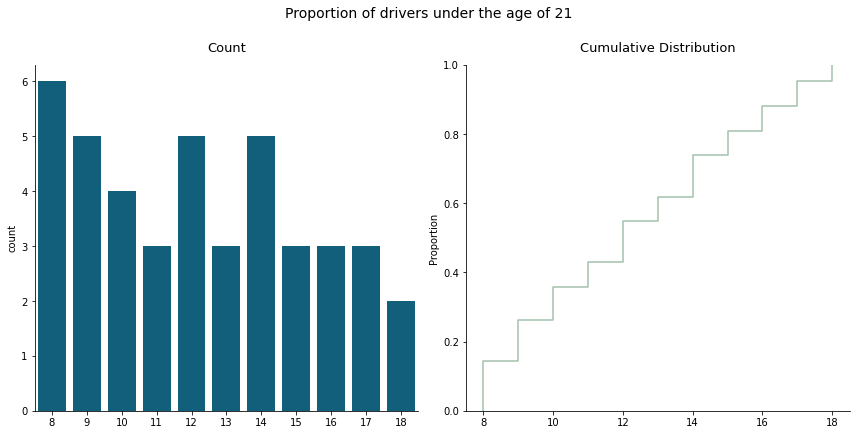

In [9]:
#create subplots
fig, axes = plt.subplots(1,2, figsize = (12,6))


#plot histogram
sns.countplot(x = safety['Percent Under 21'],  ax = axes.flat[0], color = '#00688B')
axes.flat[0].set_title('Count', fontsize = 13, y = 1.02)
axes.flat[0].set_xlabel('')

#plot empirical cumulative distribution
sns.ecdfplot(x = safety['Percent Under 21'], ax = axes.flat[1], color = '#A3C1AD')
axes.flat[1].set_title('Cumulative Distribution', fontsize = 13, y = 1.02)
axes.flat[1].set_xlabel('')

#customize the plot
plt.suptitle('Proportion of drivers under the age of 21', fontsize = 14, y = 1)
plt.tight_layout()
sns.despine(ax = axes.flat[0])
sns.despine(ax = axes.flat[1])

#display
plt.show()

The proportion for drivers under the age of 21 spans from 8% to 18% across the 42 cities. The most common proportion is 8% and is observed in 6 cities. <br>In addition, based on the cumulative distribution plot, the proportion of drivers under the age of 21 in 80% of the cities is ranging from 8% to 15%.

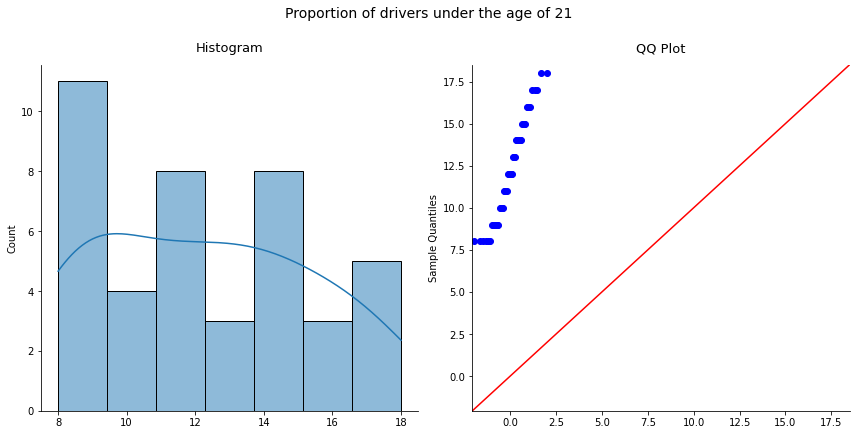

In [10]:
#create subplots
fig, axes = plt.subplots(1,2, figsize = (12,6))


#plot histogram
sns.histplot(x = safety['Percent Under 21'],  ax = axes.flat[0], kde = True)
axes.flat[0].set_title('Histogram', fontsize = 13, y = 1.02)
axes.flat[0].set_xlabel('')

#plot empirical cumulative distribution
sm.qqplot(safety['Percent Under 21'], line = '45', ax = axes.flat[1])
axes.flat[1].set_title('QQ Plot', fontsize = 13, y = 1.02)
axes.flat[1].set_xlabel('')

#customize the plot
plt.suptitle('Proportion of drivers under the age of 21', fontsize = 14, y = 1)
plt.tight_layout()
sns.despine(ax = axes.flat[0])
sns.despine(ax = axes.flat[1])

#display
plt.show()

The histogram above does not approximate a bell curve, and is probably not on a normal distribution.<br> The same is observed from the QQ Plot where the points are not aligned with the straight line which also suggets that the data is not normally distributed

**Fatal Accidents per 1000**

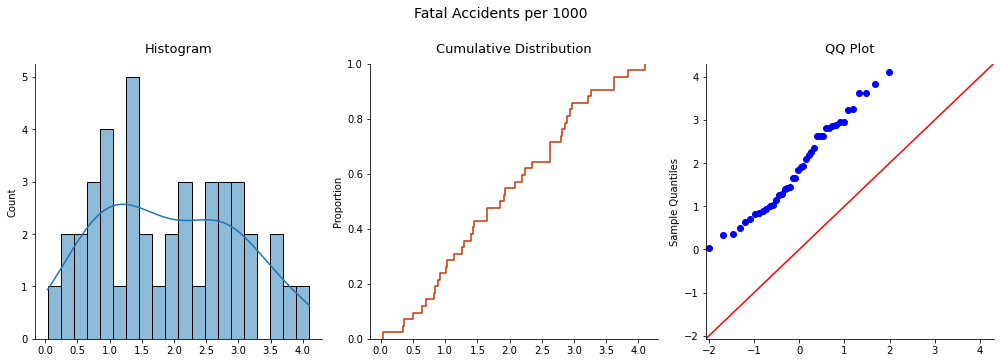

In [11]:
#create subplots
fig, axes = plt.subplots(1,3, figsize = (14,5))


#plot histogram
sns.histplot(x = safety['Fatal Accidents per 1000'],  ax = axes.flat[0], kde = True, bins = 20)
axes.flat[0].set_title('Histogram', fontsize = 13, y = 1.02)
axes.flat[0].set_xlabel('')

#plot empirical cumulative distribution
sns.ecdfplot(x = safety['Fatal Accidents per 1000'], ax = axes.flat[1], color = '#C83200')
axes.flat[1].set_title('Cumulative Distribution', fontsize = 13, y = 1.02)
axes.flat[1].set_xlabel('')

#plot empirical cumulative distribution
sm.qqplot(safety['Fatal Accidents per 1000'], line = '45', ax = axes.flat[2])
axes.flat[2].set_title('QQ Plot', fontsize = 13, y = 1.02)
axes.flat[2].set_xlabel('')

#customize the plot
plt.suptitle('Fatal Accidents per 1000', fontsize = 14, y = 1)
plt.tight_layout()
sns.despine(ax = axes.flat[0])
sns.despine(ax = axes.flat[1])
sns.despine(ax = axes.flat[2])
            
#display
plt.show()

`Fatal Accidents per 1000` ranges from 0 to 4, with more observation having less than 2 fatal accidents.
The distirbution for `Fatal Accidents per 1000` slightly resembles the bell curve. 
The points on the QQ Plot are also slightly closer to the line compared to that of the `Percent Under 21` data. <br>
However, it is still clear that this data is also not normally distributed. 

### Part II:Correlation

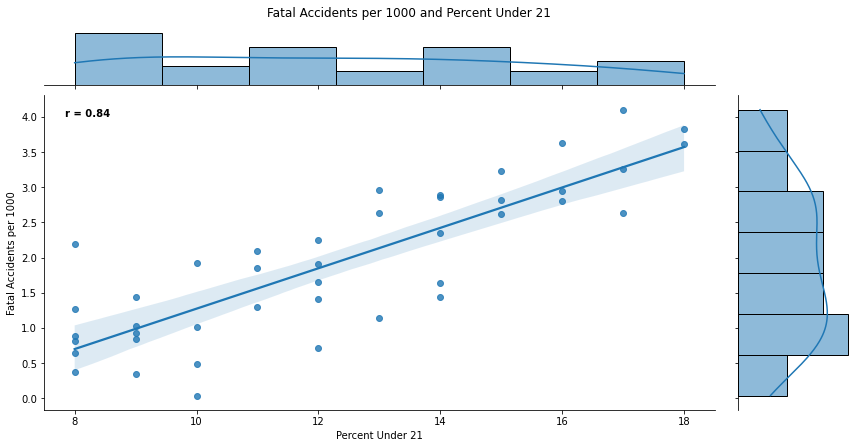

In [12]:
#plot the data
ax = sns.jointplot(x = 'Percent Under 21', y = 'Fatal Accidents per 1000', data = safety, kind = 'reg')

#compute for correlation coefficient (r)
r = safety['Percent Under 21'].corr(safety['Fatal Accidents per 1000'])

#annotate plot with r value
plt.text(-55,4,f"r = {r:.2f}", weight = 'semibold')


#other customizations
ax.fig.set_figwidth(13)
plt.suptitle('Fatal Accidents per 1000 and Percent Under 21', y = 1.03) 

#display
plt.show()

`Fatal Accidents per 1000` and `Proportion of Driver Under Age of 21` has a strong positive linear relationship having a **correlation coefficient of `.84`**

As the percentage of drivers below the age of 21 increases, the number of fatal accidents also increases. 
But it cannot be inferred that having more drivers under the age of 21 will lead to more fatal accidents beacuse correlation does not imply causation and there are other factors that may affect fatal accidents

### Part III: Simple Linear Regression Model

**Create model**

In [13]:
#import sci-kit library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Define `x` and `y`**

In [14]:
x = safety[['Percent Under 21']]
y = safety[['Fatal Accidents per 1000']]

**Data split**

In [15]:
#define test size
test_size = .20

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = test_size, shuffle = False, random_state = 0)

display(train_x.shape)
display(test_x.shape)

(33, 1)

(9, 1)

**Fit model**

In [16]:
#create LinearRegression model instance
reg = LinearRegression()

#fit the data to the model
reg.fit(train_x, train_y)

LinearRegression()

**Predicted and actual values**

In [17]:
#predicted
prediction = reg.predict(test_x)

#convert to dataframe
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns = {0:'Predicted Fatal Accidents per 1000'})

#actual
actual = pd.DataFrame(test_y)
actual = actual.reset_index(drop = True).rename(columns = {'Fatal Accidents per 1000':'Actual Fatal Accidents per 1000'})

data = pd.concat([prediction, actual], axis = 1)

data

,Predicted Fatal Accidents per 1000,Actual Fatal Accidents per 1000
0,3.594243,3.614
1,1.247917,1.926
2,2.421080,1.643
3,3.007661,2.943
4,1.834499,1.913
5,2.714371,2.814
6,2.127789,2.634
7,0.954627,0.926
8,3.300952,3.256


**Plot predicted and actual values**

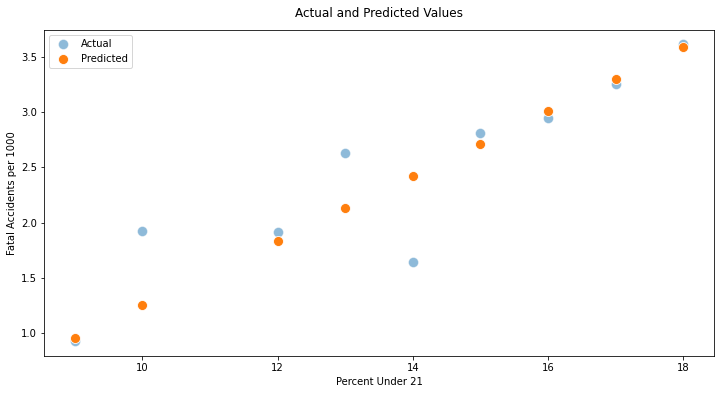

In [18]:
#create subplots
plt.subplots(figsize = (12,6))

#plot actual values
sns.scatterplot(x=test_x['Percent Under 21'], y=test_y['Fatal Accidents per 1000'], s = 100, alpha = .5)

#plot predicted values
x_test = test_x.reset_index(drop=True)
sns.scatterplot(x=x_test['Percent Under 21'], y=prediction['Predicted Fatal Accidents per 1000'], s = 100)

#add customize
plt.legend(['Actual', 'Predicted'])
plt.title('Actual and Predicted Values', y = 1.02)

#display
plt.show()


The values predicted by the model are not far from the actual values of the test dataset. 
<br>
To measure how well our model predicted the actual values, it is important to calculate the `Coefficient of Determination` or `r-squared`.

**Plot actual vs predicted values**

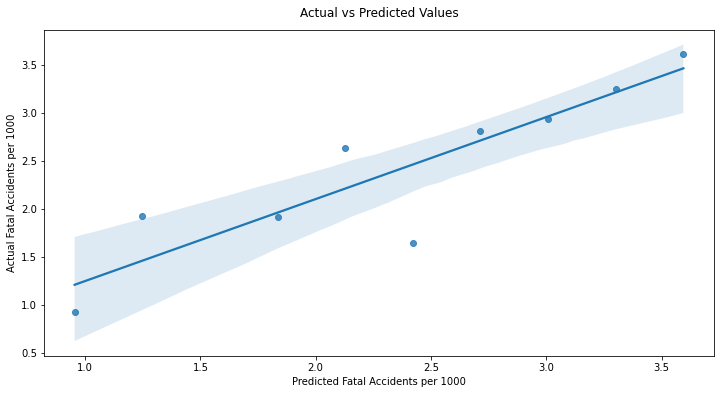

In [19]:
#create subplots
plt.subplots(figsize = (12,6))

#plot actual values
sns.regplot(x=prediction['Predicted Fatal Accidents per 1000'], y=actual['Actual Fatal Accidents per 1000'])

#customize
plt.title('Actual vs Predicted Values', y = 1.02)

#display
plt.show()

Based on this chart, it can be observed that there is a strong correlation between the model's prediction and its actual values. This also suggests that our model's predictions has a high accuracy rate.

To further check the model results, presented below is the model summary.

### Part IV: Model summary

In [20]:
#create model summary

x = safety['Percent Under 21']
x = sm.add_constant(x)
y = safety['Fatal Accidents per 1000']

model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Fatal Accidents per 1000   R-squared:                       0.705
Model:                                  OLS   Adj. R-squared:                  0.697
Method:                       Least Squares   F-statistic:                     95.40
Date:                      Fri, 29 Apr 2022   Prob (F-statistic):           3.79e-12
Time:                              03:49:57   Log-Likelihood:                -36.364
No. Observations:                        42   AIC:                             76.73
Df Residuals:                            40   BIC:                             80.20
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5974      0.372     -4.298      0.000      -2.349      -0.846
Percent Under 21     0.2871      0.029      9.767      0.000       0.228       0.346
==============================================================================
Omnibus:                        0.328   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.113
Skew:                          -0.127   Prob(JB):                        0.945
Kurtosis:                       2.986   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Part V: Conclusions

- The `p-value` of < .05 indicates that we have enough evidence to reject the null hypothesis and conclude that the slope of the regression line differs from 0 and that our model performs better than the baseline model (mean)
- The `r-squared` is .70 which means that the `Percent Under 21` explains 70% of the variability in `Fatal Accidents per 1000`
- The regression equation of `y = -1.5974 + .2871x` says that for every 1 unit increase in the proportion of drivers under the age of 21, there is a corresponding `.2871` increase in the fatality rate per 1000 licenses. 

### Part VI: Recommendations

**The regression analysis revealed that while the proportion of drivers under 21 is increasing, the number of fatal accident also increases.** <br> <br>

However, the data collected is not sufficient to identify the root-cause of the observed relationship. Therefore, the US Department of Transportation should conduct further analysis to determine what other factors contribute to the increasing fatal accidents in other cities. <br> <br> 

Additional data might be needed, and should be collected, such as the:
- cause of the accident,
- age group of drivers involved in the accident
- time and day of the accident, 
- weather condition, 
- level of difficulty in getting a license per city etc.<br> <br>

The US Department of Transportation must also revisit the regulations concerning the process of granting a license to an individual below 21 years of age. Perhaps a more stringent review of their application should also be implemented.

Raising the minimum age required to have a license may also be considered depending on the results of the additional analysis.


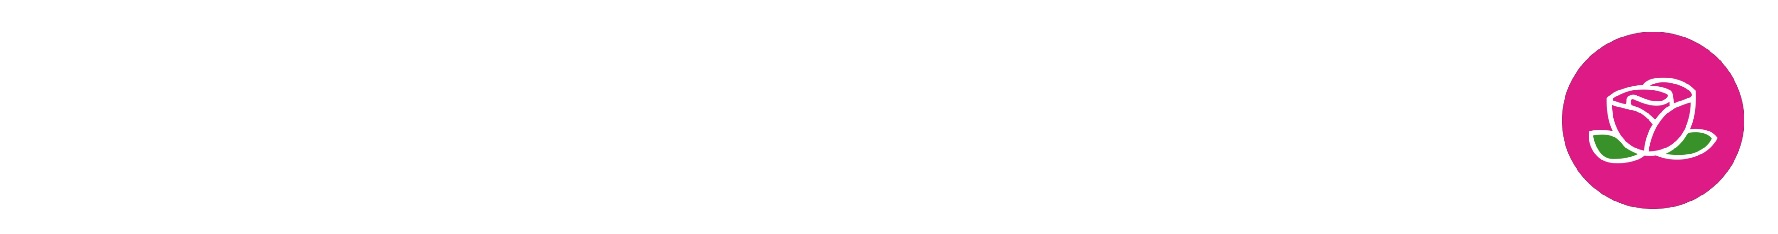